# 2 Exploratory Data Analysis<a id='2_Exploratory_Data_Analysis'></a>

## 2.1 Contents<a id='2.1_Contents'></a>

* [2.1 Contents](#2.1_Contents)
* [2.2 Introduction](#2.2_Introduction)
* [2.3 Imports](#2.3_Imports)
* [2.4 Load the Data](#2.4_Load_The_Data)
* [2.5 Explore the Data](#2.5_Explore_Data)
    * [2.5.1 Analyze the Three Variables with Missing Values](#2.5.1_Analyze_Missing_Values)
    * [2.5.2 Analyze the Categorical Features](#2.5.2_Analyze_Categorical_Features)
        * [2.5.2.1 Basement Enclosure Crawl Space Type](#2.5.2.1_Basement_Enclosure)    
        * [2.5.2.2 Condominium Indicator](#2.5.2.2_Condominium)        
        * [2.5.2.3 CRS Discount](#2.5.2.3_CRS_Discount)       
        * [2.5.2.4 Deductible Amount of Building Coverage](#2.5.2.4_Deductible_Building)       
        * [2.5.2.5 Deductible Amount of Contents Coverage](#2.5.2.5_Deductible_Contents)   
        * [2.5.2.6 Flood Zone](#2.5.2.6_Flood_Zone)       
        * [2.5.2.7 Location of Contents](#2.5.2.7_Location_Contents)      
        * [2.5.2.8 Number of Floors](#2.5.2.8_Number_of_Floors)      
        * [2.5.2.9 Occupancy Type](#2.5.2.9_Occupancy_Type)              
        * [2.5.2.10 Rate Method](#2.5.2.10_Rate_Method)            
        * [2.5.2.11 Construction Indicator](#2.5.2.11_Construction)                            
        * [2.5.2.12 Primary Residence Indicator](#2.5.2.12_Primary_Residence)    
        * [2.5.2.13 Small Business Indicator](#2.5.2.13_Small_Business)            
        * [2.5.2.14 Elevated Building Indicator](#2.5.2.14_Elevated_Building)               
    * [2.5.3 Analyze the Numeric Features](#2.5.3_Analyze_Numeric_Features)
* [2.6 Summary](#2.6_Summary) 


## 2.2 Introduction<a id='2.2_Introduction'></a>

After the preliminary data cleaning and pre-processing, a new dataset is generated where most variables are without any missing values. During the EDA step, further analysis of the dataset will be conducted, and the relationships between the variables and between the target and variables will be explored.

## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import ppscore as pps
from sklearn.decomposition import PCA

%matplotlib inline
sns.set(style="darkgrid")

## 2.4 Load The Data<a id='2.4_Load_The_Data'></a>

In [2]:
df = pd.read_csv('../data/houston-2019.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32364 entries, 0 to 32363
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   basefloodelevation                  13521 non-null  float64
 1   basementenclosurecrawlspacetype     32364 non-null  float64
 2   condominiumindicator                32364 non-null  object 
 3   construction                        32364 non-null  object 
 4   crsdiscount                         32364 non-null  float64
 5   deductibleamountinbuildingcoverage  32364 non-null  object 
 6   deductibleamountincontentscoverage  32364 non-null  object 
 7   elevatedbuildingindicator           32364 non-null  object 
 8   elevationcertificateindicator       12130 non-null  object 
 9   elevationdifference                 32364 non-null  int64  
 10  floodzone                           32364 non-null  object 
 11  locationofcontents                  32364

In [4]:
df.head()

,basefloodelevation,basementenclosurecrawlspacetype,condominiumindicator,construction,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationcertificateindicator,elevationdifference,...,lowestfloorelevation,numberoffloorsininsuredbuilding,occupancytype,primaryresidenceindicator,ratemethod,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy,buildingage
0,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,NaN,1.0,1,N,7,N,250000,100000,376,60.0
1,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,NaN,1.0,1,Y,7,N,200000,80000,353,54.0
2,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,NaN,1.0,1,Y,7,N,250000,100000,374,13.0
3,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,NaN,3.0,1,Y,7,N,250000,100000,376,17.0
4,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,NaN,1.0,1,Y,7,N,250000,100000,376,38.0


## 2.5 Explore the Data<a id='2.5_Explore_Data'></a>

### 2.5.1 Analyze the Three Variables with Missing Values<a id='2.5.1_Analyze_Missing_Values'></a>

We are not sure if we want to remove `basefloodelevation`, `lowestadjacentgrade`, and `lowestfloorelevation`. They have a lot of missing values, but given that the dataset doesn't have a lot of numeric features (most of them are categorical features), so we may want to keep them. 

First, let's generate a new dataset which will drop the missing values for the three variables.

In [5]:
df1 = df.dropna(subset=['basefloodelevation', 'lowestadjacentgrade', 'lowestfloorelevation'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 5 to 32362
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   basefloodelevation                  13319 non-null  float64
 1   basementenclosurecrawlspacetype     13319 non-null  float64
 2   condominiumindicator                13319 non-null  object 
 3   construction                        13319 non-null  object 
 4   crsdiscount                         13319 non-null  float64
 5   deductibleamountinbuildingcoverage  13319 non-null  object 
 6   deductibleamountincontentscoverage  13319 non-null  object 
 7   elevatedbuildingindicator           13319 non-null  object 
 8   elevationcertificateindicator       5334 non-null   object 
 9   elevationdifference                 13319 non-null  int64  
 10  floodzone                           13319 non-null  object 
 11  locationofcontents                  13319

We still have 13,319 records left. Next, let's investigate the relationship between the three variables. If they are very correlated, then we can just keep one of them. First, let's only use the dataset within the 95% distribution, so we can take off the extreme outlier values.

In [6]:
lower, upper = df1['basefloodelevation'].quantile([0.025, 0.975])
basefloodelevation = ((df1['basefloodelevation'] >= lower) & (df1['basefloodelevation'] <= upper))
df1 = df1[basefloodelevation]

lower, upper = df1['lowestfloorelevation'].quantile([0.025, 0.975])
lowestfloorelevation = ((df1['lowestfloorelevation'] >= lower) & (df1['lowestfloorelevation'] <= upper))
df1 = df1[lowestfloorelevation]

lower, upper = df1['lowestadjacentgrade'].quantile([0.025, 0.975])
lowestadjacentgrade = ((df1['lowestadjacentgrade'] >= lower) & (df1['lowestadjacentgrade'] <= upper))
df1 = df1[lowestadjacentgrade]


Now, let's make scatter plots to examine their relationships.

0.9928670992196884


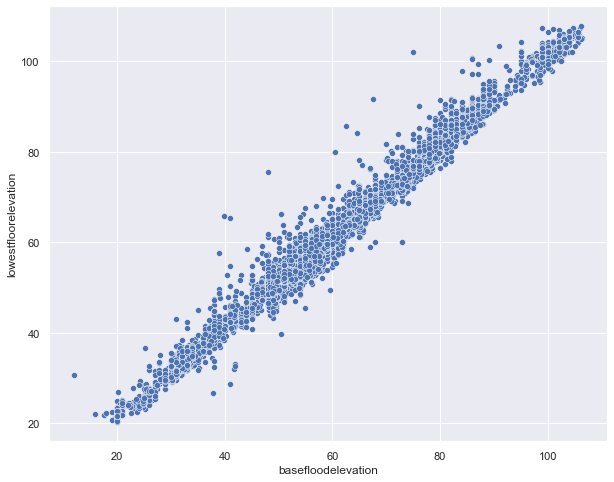

In [7]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.scatterplot(x='basefloodelevation', y='lowestfloorelevation', data=df1)

r, p = scipy.stats.pearsonr(x=df1['basefloodelevation'], y=df1['lowestfloorelevation'])
print(r)

As we can see, `basefloodelevation` and `lowestfloorelevation` are very correlated. The pearson coefficient is 0.99. 

0.9923768974088814


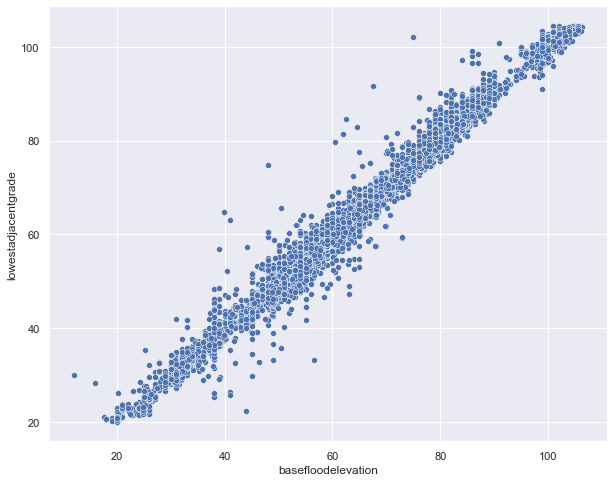

In [8]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.scatterplot(x='basefloodelevation', y='lowestadjacentgrade', data=df1)

r, p = scipy.stats.pearsonr(x=df1['basefloodelevation'], y=df1['lowestadjacentgrade'])
print(r)

Similarly, `basefloodelevation` and `lowestadjacentgrade` are very correlated. The pearson coefficient is 0.99. 

**Therefore, if we decide to keep these variables, we can just use one of them.**

Another check is to examine the correlation between the target (insurance premium) and numeric features. It turns out that the correlation coefficient is only 0.0031 between the insurance premium and basefloodelevation, 0.0083 between the insurance premium and lowestadjacentgrade, and 0.0015 between the insurance premium and lowestfloorelevation. All these correlation coefficient values are very low, so they may not provide much benefit in the modeling. Also given that they have a lot of missing values, it's better for us to remove them instead of keeping them. On the other hand, the correlation coefficient is 0.055 between the insurance premium and elevation difference, which is not too low, so we should keep `elevationdifference`.

<AxesSubplot:>

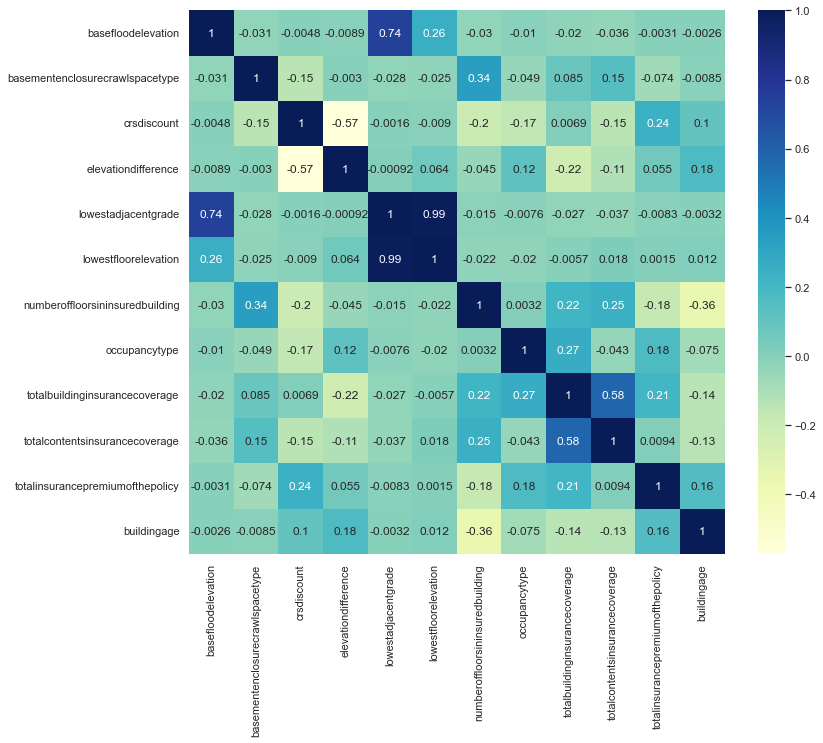

In [9]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [10]:
df = df.drop(columns=['basefloodelevation', 'lowestadjacentgrade', 'lowestfloorelevation'])
df.drop_duplicates(keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31579 entries, 0 to 32363
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   basementenclosurecrawlspacetype     31579 non-null  float64
 1   condominiumindicator                31579 non-null  object 
 2   construction                        31579 non-null  object 
 3   crsdiscount                         31579 non-null  float64
 4   deductibleamountinbuildingcoverage  31579 non-null  object 
 5   deductibleamountincontentscoverage  31579 non-null  object 
 6   elevatedbuildingindicator           31579 non-null  object 
 7   elevationcertificateindicator       11919 non-null  object 
 8   elevationdifference                 31579 non-null  int64  
 9   floodzone                           31579 non-null  object 
 10  locationofcontents                  31579 non-null  object 
 11  numberoffloorsininsuredbuilding     31579

In [11]:
df['elevationdifference'].describe()

count    31579.000000
mean       592.504639
std        496.556056
min      -9986.000000
25%          1.000000
50%        999.000000
75%        999.000000
max       9989.000000
Name: elevationdifference, dtype: float64

The `elevationdifference` variable still has some values of 999, which is incorrect. We should remove them.

In [12]:
df = df[df['elevationdifference'] != 999]
df['elevationdifference'].describe()

count    12870.000000
mean         1.586092
std        124.872307
min      -9986.000000
25%          0.000000
50%          1.000000
75%          2.000000
max       9989.000000
Name: elevationdifference, dtype: float64

Again, there are some extreme values such as 9989 and -9986, which are not correct. Here we use 99% rule to only keep the values within 99% interval.

In [13]:
lower, upper = df['elevationdifference'].quantile([0.005, 0.995])
elevdiff = ((df['elevationdifference'] >= lower) & (df['elevationdifference'] <= upper))
df = df[elevdiff]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12775 entries, 5 to 32361
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   basementenclosurecrawlspacetype     12775 non-null  float64
 1   condominiumindicator                12775 non-null  object 
 2   construction                        12775 non-null  object 
 3   crsdiscount                         12775 non-null  float64
 4   deductibleamountinbuildingcoverage  12775 non-null  object 
 5   deductibleamountincontentscoverage  12775 non-null  object 
 6   elevatedbuildingindicator           12775 non-null  object 
 7   elevationcertificateindicator       5338 non-null   object 
 8   elevationdifference                 12775 non-null  int64  
 9   floodzone                           12775 non-null  object 
 10  locationofcontents                  12775 non-null  object 
 11  numberoffloorsininsuredbuilding     12775

Text(0, 0.5, 'Number of Houses')

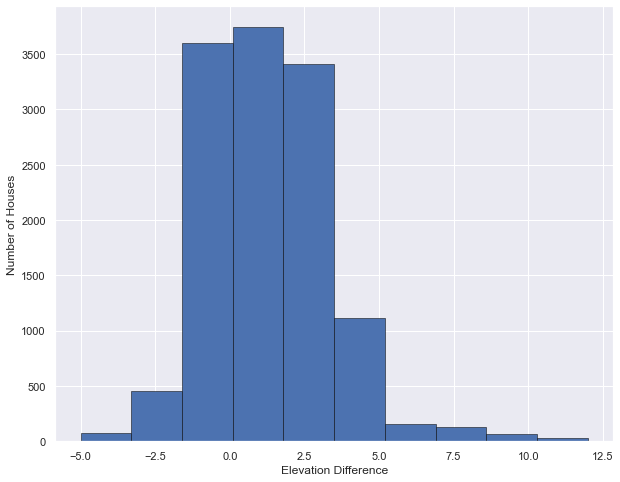

In [14]:
plt.plot(figsize=(10,8))
plt.hist(df['elevationdifference'], bins=10, edgecolor='black', linewidth=0.5)
plt.xlabel('Elevation Difference')
plt.ylabel('Number of Houses')

<AxesSubplot:xlabel='elevationdifference', ylabel='totalinsurancepremiumofthepolicy'>

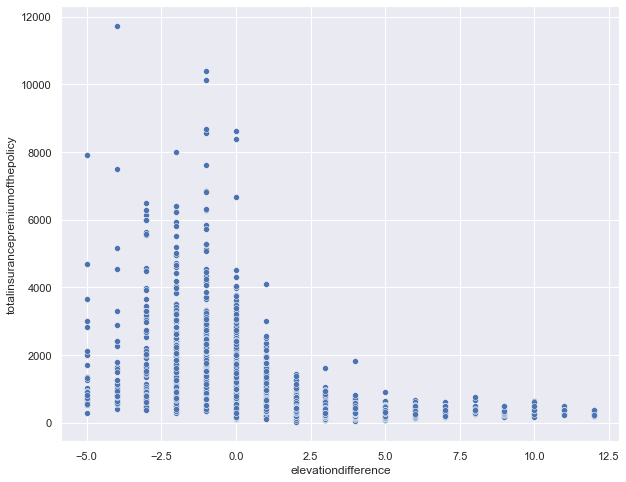

In [15]:
sns.scatterplot(x='elevationdifference', y='totalinsurancepremiumofthepolicy', data=df)

**The relationship between `elevationdifference` and the target `totalinsurancepremiumofthepolicy` suggests that lower `elevationdifference` generally has higher premium.**

In [16]:
df.drop_duplicates(keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12775 entries, 5 to 32361
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   basementenclosurecrawlspacetype     12775 non-null  float64
 1   condominiumindicator                12775 non-null  object 
 2   construction                        12775 non-null  object 
 3   crsdiscount                         12775 non-null  float64
 4   deductibleamountinbuildingcoverage  12775 non-null  object 
 5   deductibleamountincontentscoverage  12775 non-null  object 
 6   elevatedbuildingindicator           12775 non-null  object 
 7   elevationcertificateindicator       5338 non-null   object 
 8   elevationdifference                 12775 non-null  int64  
 9   floodzone                           12775 non-null  object 
 10  locationofcontents                  12775 non-null  object 
 11  numberoffloorsininsuredbuilding     12775

### 2.5.2 Analyze the Categorical Features<a id='2.5.2_Analyze_Categorical_Features'></a>

Let's investigate some categorical features which have more than 2 values. 

In [17]:
df_cat = df.select_dtypes(include = 'object')
df_cat.nunique()

condominiumindicator                   4
construction                           2
deductibleamountinbuildingcoverage    12
deductibleamountincontentscoverage    13
elevatedbuildingindicator              2
elevationcertificateindicator          6
floodzone                             19
locationofcontents                     5
primaryresidenceindicator              2
ratemethod                             9
smallbusinessindicatorbuilding         2
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12775 entries, 5 to 32361
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   basementenclosurecrawlspacetype     12775 non-null  float64
 1   condominiumindicator                12775 non-null  object 
 2   construction                        12775 non-null  object 
 3   crsdiscount                         12775 non-null  float64
 4   deductibleamountinbuildingcoverage  12775 non-null  object 
 5   deductibleamountincontentscoverage  12775 non-null  object 
 6   elevatedbuildingindicator           12775 non-null  object 
 7   elevationcertificateindicator       5338 non-null   object 
 8   elevationdifference                 12775 non-null  int64  
 9   floodzone                           12775 non-null  object 
 10  locationofcontents                  12775 non-null  object 
 11  numberoffloorsininsuredbuilding     12775

The `elevationcertificateindicator` has a lot of missing values, while other variables have no missing values. It's better to remove this variable. 

In [19]:
df.drop(columns='elevationcertificateindicator', inplace=True)
df.drop_duplicates(keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12461 entries, 5 to 32361
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   basementenclosurecrawlspacetype     12461 non-null  float64
 1   condominiumindicator                12461 non-null  object 
 2   construction                        12461 non-null  object 
 3   crsdiscount                         12461 non-null  float64
 4   deductibleamountinbuildingcoverage  12461 non-null  object 
 5   deductibleamountincontentscoverage  12461 non-null  object 
 6   elevatedbuildingindicator           12461 non-null  object 
 7   elevationdifference                 12461 non-null  int64  
 8   floodzone                           12461 non-null  object 
 9   locationofcontents                  12461 non-null  object 
 10  numberoffloorsininsuredbuilding     12461 non-null  float64
 11  occupancytype                       12461

#### 2.5.2.1 Basement Enclosure Crawl Space Type<a id='2.5.2.1_Basement_Enclosure'></a>

This variable has values from 0 to 4 so it is regarded as numeric, but it's actually a categorical feature.

In [20]:
basement = pd.concat([df.basementenclosurecrawlspacetype.value_counts(), 
                                100 * df.basementenclosurecrawlspacetype.value_counts() / len(df.basementenclosurecrawlspacetype)], axis=1)
basement.columns=['count', '%']
basement.sort_values(by='count', ascending=False)

,count,%
0.0,11603,93.114517
3.0,441,3.539042
2.0,272,2.182810
1.0,125,1.003130
4.0,20,0.160501


More than 90% have a value of 0, which means the building doesn't have a basement. Other values have different types of basement.

This categorical feature doesn't seem to have a clear ordinal type, so we will use pd.get_dummies to create the new feature columns, Before that, let's get rid of those with small percentage of total numbers, and rename them as "A", "B", etc.

In [21]:
df1 = df[(df['basementenclosurecrawlspacetype'] != 4.0)]

df1.loc[df1['basementenclosurecrawlspacetype'] == 0.0, 'basementenclosurecrawlspacetype'] = "A"
df1.loc[df1['basementenclosurecrawlspacetype'] == 3.0, 'basementenclosurecrawlspacetype'] = "B"
df1.loc[df1['basementenclosurecrawlspacetype'] == 2.0, 'basementenclosurecrawlspacetype'] = "C"
df1.loc[df1['basementenclosurecrawlspacetype'] == 1.0, 'basementenclosurecrawlspacetype'] = "D"
df1['basementenclosurecrawlspacetype'].value_counts()

C:\Users\Cheng\AppData\Local\Temp\ipykernel_15756\3317914000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['basementenclosurecrawlspacetype'] == 0.0, 'basementenclosurecrawlspacetype'] = "A"


A    11603
B      441
C      272
D      125
Name: basementenclosurecrawlspacetype, dtype: int64

In [22]:
basement_stat = df1.groupby('basementenclosurecrawlspacetype')['totalinsurancepremiumofthepolicy'].agg(['mean', 'max', 'min'])
print(basement_stat)

                                       mean    max  min
basementenclosurecrawlspacetype                        
A                                754.100664  11720   31
B                                609.056689   3387  193
C                                602.062500   4687  166
D                                687.432000   7897  248


In [23]:
df2 = pd.get_dummies(df1, columns=['basementenclosurecrawlspacetype'], drop_first=True)
df2.head()

,condominiumindicator,construction,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationdifference,floodzone,locationofcontents,numberoffloorsininsuredbuilding,...,primaryresidenceindicator,ratemethod,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy,buildingage,basementenclosurecrawlspacetype_B,basementenclosurecrawlspacetype_C,basementenclosurecrawlspacetype_D
5,N,N,0.15,3,2,N,1,AE,Lowest floor only above ground level (No basem...,1.0,...,Y,1,N,199700,55100,726,38.0,0,0,0
27,N,N,0.25,1,1,N,7,AE,Lowest floor only above ground level (No basem...,1.0,...,Y,B,N,100000,20000,211,45.0,0,0,0
29,N,N,0.25,F,F,N,0,AE,Lowest floor only above ground level (No basem...,1.0,...,N,1,N,250000,100000,1540,20.0,0,0,0
53,N,N,0.25,F,F,N,3,AE,Lowest floor above ground level and higher flo...,2.0,...,Y,B,N,220000,84000,355,43.0,0,0,0
68,N,N,0.25,F,F,N,3,AE,Lowest floor only above ground level (No basem...,1.0,...,Y,B,N,104500,52500,265,61.0,0,0,0


#### 2.5.2.2 Condominium Indicator<a id='2.5.2.2_Condominium'></a>

In [24]:
condo = pd.concat([df2.condominiumindicator.value_counts(), 
                                100 * df2.condominiumindicator.value_counts() / len(df2.condominiumindicator)], axis=1)
condo.columns=['count', '%']
condo.sort_values(by='count', ascending=False)

,count,%
N,12224,98.255767
U,215,1.728157
A,1,0.008038
L,1,0.008038


More than 98% have a value of 'N", which means that the building is not a condominium. Other values have different types of condominium. Also, there are only 1 value for "A" and "L", so we can remove those two to avoid potential overfitting issue.

In [25]:
df3 = df2[(df2['condominiumindicator']=='N') | (df2['condominiumindicator']== 'U')]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12439 entries, 5 to 32361
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   condominiumindicator                12439 non-null  object 
 1   construction                        12439 non-null  object 
 2   crsdiscount                         12439 non-null  float64
 3   deductibleamountinbuildingcoverage  12439 non-null  object 
 4   deductibleamountincontentscoverage  12439 non-null  object 
 5   elevatedbuildingindicator           12439 non-null  object 
 6   elevationdifference                 12439 non-null  int64  
 7   floodzone                           12439 non-null  object 
 8   locationofcontents                  12439 non-null  object 
 9   numberoffloorsininsuredbuilding     12439 non-null  float64
 10  occupancytype                       12439 non-null  int64  
 11  primaryresidenceindicator           12439

In [26]:
condo_stat = df3.groupby('condominiumindicator')['totalinsurancepremiumofthepolicy'].agg(['mean', 'max', 'min'])
print(condo_stat)

                            mean    max  min
condominiumindicator                        
N                     748.929156  11720   31
U                     521.725581   3102  104


Valueof 'N' has some extreme preimum price values. We can also rename "N" and "U" to 0 and 1.

In [27]:
df4 = pd.get_dummies(df3, columns=['condominiumindicator'], drop_first=True)
df4.head()

,construction,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationdifference,floodzone,locationofcontents,numberoffloorsininsuredbuilding,occupancytype,...,ratemethod,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy,buildingage,basementenclosurecrawlspacetype_B,basementenclosurecrawlspacetype_C,basementenclosurecrawlspacetype_D,condominiumindicator_U
5,N,0.15,3,2,N,1,AE,Lowest floor only above ground level (No basem...,1.0,1,...,1,N,199700,55100,726,38.0,0,0,0,0
27,N,0.25,1,1,N,7,AE,Lowest floor only above ground level (No basem...,1.0,1,...,B,N,100000,20000,211,45.0,0,0,0,0
29,N,0.25,F,F,N,0,AE,Lowest floor only above ground level (No basem...,1.0,1,...,1,N,250000,100000,1540,20.0,0,0,0,0
53,N,0.25,F,F,N,3,AE,Lowest floor above ground level and higher flo...,2.0,2,...,B,N,220000,84000,355,43.0,0,0,0,0
68,N,0.25,F,F,N,3,AE,Lowest floor only above ground level (No basem...,1.0,1,...,B,N,104500,52500,265,61.0,0,0,0,0


#### 2.5.2.3 CRS Discount<a id='2.5.2.3_CRS_Discount'></a>

This variable has values from 0 to 4 so it is regarded as numeric, but it's actually a categorical feature.

In [28]:
crs = pd.concat([df4.crsdiscount.value_counts(), 
                                100 * df4.crsdiscount.value_counts() / len(df4.crsdiscount)], axis=1)
crs.columns=['count', '%']
crs.sort_values(by='count', ascending=False)

,count,%
0.25,8099,65.109736
0.15,3027,24.334754
0.00,1269,10.201785
0.10,36,0.289412
0.20,5,0.040196
0.05,3,0.024118


Here, values of 0.05 and 0.20 are a very small portion of the whole dataset, so we could remove them to avoid potential overfitting issue. Also, this categorical feature seems to have a clear ordinal type, so we can divide it by 0.05 to get the new numeric values.

In [29]:
df5 = df4[(df4['crsdiscount'] != 0.05) & (df4['crsdiscount'] != 0.20)]

df5.loc[df5['crsdiscount'] == 0.00, 'crsdiscount'] = 0.0
df5.loc[df5['crsdiscount'] == 0.10, 'crsdiscount'] = 2.0
df5.loc[df5['crsdiscount'] == 0.15, 'crsdiscount'] = 3.0
df5.loc[df5['crsdiscount'] == 0.25, 'crsdiscount'] = 5.0

df5['crsdiscount'].value_counts()

5.0    8099
3.0    3027
0.0    1269
2.0      36
Name: crsdiscount, dtype: int64

In [30]:
crs_stat = df5.groupby('crsdiscount')['totalinsurancepremiumofthepolicy'].agg(['mean', 'max', 'min'])
print(crs_stat)

                    mean    max  min
crsdiscount                         
0.0          1092.152088  10409  102
2.0          1033.944444   2574  427
3.0           695.930624   5269   71
5.0           707.486727  11720   31


Generally, higher crsdiscount number is related to relatively lower premium price.

#### 2.5.2.4 Deductible Amount of Building Coverage<a id='2.5.2.4_Deductible_Building'></a>

In [31]:
deduct_building = pd.concat([df5.deductibleamountinbuildingcoverage.value_counts(), 
                                100 * df5.deductibleamountinbuildingcoverage.value_counts() / len(df5.deductibleamountinbuildingcoverage)], axis=1)
deduct_building.columns=['count', '%']
deduct_building.sort_values(by='count', ascending=False)

,count,%
F,6677,53.712493
2,2089,16.804762
5,1685,13.554823
3,508,4.086558
1,450,3.619982
A,371,2.984474
G,366,2.944252
4,256,2.059368
E,12,0.096533
B,10,0.080444


More than half has a value of "F", which means the deductible is $1,250. 

After that the most frequent values are "2" and "5", which means the deductible is $2,000 and 5,000, respectively.

The least frequent values are "E", "B", "D", and "C". We could remove those four to avoid potential overfitting issue.

In [32]:
df6 = df5[(df5['deductibleamountinbuildingcoverage'] != "E") & (df5['deductibleamountinbuildingcoverage'] != "B")
         & (df5['deductibleamountinbuildingcoverage'] != "D") & (df5['deductibleamountinbuildingcoverage'] != "C")]
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12402 entries, 5 to 32361
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   construction                        12402 non-null  object 
 1   crsdiscount                         12402 non-null  float64
 2   deductibleamountinbuildingcoverage  12402 non-null  object 
 3   deductibleamountincontentscoverage  12402 non-null  object 
 4   elevatedbuildingindicator           12402 non-null  object 
 5   elevationdifference                 12402 non-null  int64  
 6   floodzone                           12402 non-null  object 
 7   locationofcontents                  12402 non-null  object 
 8   numberoffloorsininsuredbuilding     12402 non-null  float64
 9   occupancytype                       12402 non-null  int64  
 10  primaryresidenceindicator           12402 non-null  object 
 11  ratemethod                          12402

This categorical feature seems to have a clear ordinal type, so we can specify them values as numeric. Below is the explanation for each value: 
1 - 1,000; 2 - 2,000; 3 - 3,000; 4 - 4,000; 5 - 5,000; A - 10,000; F - 1,250; G - 1,500
So new values are specified by dividing it to 500:
1: 1000/500 = 2.0
2: 2000/500 = 4.0
3: 3000/500 = 6.0
4: 4000/500 = 8.0
5: 5000/500 = 10.0
A: 10000/500 = 20.0
F: 1250/500 = 2.5
G: 1500/500 = 3.0

In [33]:
df6.loc[df6['deductibleamountinbuildingcoverage'] == "1", 'deductibleamountinbuildingcoverage'] = 2.0
df6.loc[df6['deductibleamountinbuildingcoverage'] == "2", 'deductibleamountinbuildingcoverage'] = 4.0
df6.loc[df6['deductibleamountinbuildingcoverage'] == "3", 'deductibleamountinbuildingcoverage'] = 6.0
df6.loc[df6['deductibleamountinbuildingcoverage'] == "4", 'deductibleamountinbuildingcoverage'] = 8.0
df6.loc[df6['deductibleamountinbuildingcoverage'] == "5", 'deductibleamountinbuildingcoverage'] = 10.0
df6.loc[df6['deductibleamountinbuildingcoverage'] == "A", 'deductibleamountinbuildingcoverage'] = 20.0
df6.loc[df6['deductibleamountinbuildingcoverage'] == "F", 'deductibleamountinbuildingcoverage'] = 2.5
df6.loc[df6['deductibleamountinbuildingcoverage'] == "G", 'deductibleamountinbuildingcoverage'] = 3.0

df6['deductibleamountinbuildingcoverage'].value_counts()

2.5     6677
4.0     2089
10.0    1685
6.0      508
2.0      450
20.0     371
3.0      366
8.0      256
Name: deductibleamountinbuildingcoverage, dtype: int64

In [34]:
deduct_building_stat = df6.groupby('deductibleamountinbuildingcoverage')['totalinsurancepremiumofthepolicy'].agg(['mean', 'max', 'min'])
print(deduct_building_stat)

                                          mean    max  min
deductibleamountinbuildingcoverage                        
2.0                                 465.782222   5556   71
2.5                                 628.881384  10125   31
3.0                                 726.497268   8397   79
4.0                                 891.818095  11720  136
6.0                                 881.921260  10131  162
8.0                                 911.472656   5578  184
10.0                                954.116320   8692  133
20.0                                974.867925   6270  160


Generally, higher deductible coverage is related to relatively higher premium price.

In [35]:
df6['deductibleamountinbuildingcoverage'] = df6['deductibleamountinbuildingcoverage'].astype(float)

C:\Users\Cheng\AppData\Local\Temp\ipykernel_15756\3624881229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['deductibleamountinbuildingcoverage'] = df6['deductibleamountinbuildingcoverage'].astype(float)


#### 2.5.2.5 Deductible Amount of Building Coverage<a id='2.5.2.5_Deductible_Contents'></a>

In [36]:
deduct_contents = pd.concat([df6.deductibleamountincontentscoverage.value_counts(), 
                                100 * df6.deductibleamountincontentscoverage.value_counts() / len(df6.deductibleamountincontentscoverage)], axis=1)
deduct_contents.columns=['count', '%']
deduct_contents.sort_values(by='count', ascending=False)

,count,%
F,6824,55.023383
2,2040,16.448960
5,1495,12.054507
1,485,3.910660
3,452,3.644573
G,401,3.233349
A,362,2.918884
4,240,1.935172
0,103,0.830511


Similar to deductible amount of buidling coverage, more than half has a value of "F", which means the deductible is $1,250. 

After that the most frequent values are "2" and "5", which means the deductible is $2,000 and 5,000, respectively.

This categorical feature seems to have a clear ordinal type, so we can specify them values as numeric. Below is the explanation for each value: 
0 - 500; 1 - 1,000; 2 - 2,000; 3 - 3,000; 4 - 4,000; 5 - 5,000; A - 10,000; F - 1,250; G - 1,500
So new values are specified by dividing it to 500:
0: 500/500 = 1.0
1: 1000/500 = 2.0
2: 2000/500 = 4.0
3: 3000/500 = 6.0
4: 4000/500 = 8.0
5: 5000/500 = 10.0
A: 10000/500 = 20.0
F: 1250/500 = 2.5
G: 1500/500 = 3.0

In [37]:
df6.loc[df6['deductibleamountincontentscoverage'] == "0", 'deductibleamountincontentscoverage'] = 1.0
df6.loc[df6['deductibleamountincontentscoverage'] == "1", 'deductibleamountincontentscoverage'] = 2.0
df6.loc[df6['deductibleamountincontentscoverage'] == "2", 'deductibleamountincontentscoverage'] = 4.0
df6.loc[df6['deductibleamountincontentscoverage'] == "3", 'deductibleamountincontentscoverage'] = 6.0
df6.loc[df6['deductibleamountincontentscoverage'] == "4", 'deductibleamountincontentscoverage'] = 8.0
df6.loc[df6['deductibleamountincontentscoverage'] == "5", 'deductibleamountincontentscoverage'] = 10.0
df6.loc[df6['deductibleamountincontentscoverage'] == "A", 'deductibleamountincontentscoverage'] = 20.0
df6.loc[df6['deductibleamountincontentscoverage'] == "F", 'deductibleamountincontentscoverage'] = 2.5
df6.loc[df6['deductibleamountincontentscoverage'] == "G", 'deductibleamountincontentscoverage'] = 3.0

df6['deductibleamountincontentscoverage'].value_counts()

2.5     6824
4.0     2040
10.0    1495
2.0      485
6.0      452
3.0      401
20.0     362
8.0      240
1.0      103
Name: deductibleamountincontentscoverage, dtype: int64

In [38]:
deduct_contents_stat = df6.groupby('deductibleamountincontentscoverage')['totalinsurancepremiumofthepolicy'].agg(['mean', 'max', 'min'])
print(deduct_contents_stat)

                                          mean    max  min
deductibleamountincontentscoverage                        
1.0                                 385.689320   2142  110
2.0                                 480.519588   5556   31
2.5                                 633.118552  10125   58
3.0                                 768.488778   8397   79
4.0                                 906.383824  11720  136
6.0                                 901.676991  10131  169
8.0                                 938.579167   5578  184
10.0                                970.197993   8692  133
20.0                                979.654696   6270  160


Generally, higher deductible coverage is related to relatively higher premium price.

In [39]:
df6['deductibleamountincontentscoverage'] = df6['deductibleamountincontentscoverage'].astype(float)

C:\Users\Cheng\AppData\Local\Temp\ipykernel_15756\2731880543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['deductibleamountincontentscoverage'] = df6['deductibleamountincontentscoverage'].astype(float)


#### 2.5.2.6 Flood Zone<a id='2.5.2.6_Flood_Zone'></a>

In [40]:
fz = pd.concat([df6.floodzone.value_counts(), 
                                100 * df6.floodzone.value_counts() / len(df6.floodzone)], axis=1)
fz.columns=['count', '%']
fz.sort_values(by='count', ascending=False)

,count,%
AE,11996,96.726334
AOB,220,1.773907
A,92,0.741816
AO,37,0.298339
AHB,14,0.112885
X,11,0.088695
A15,6,0.048379
A04,5,0.040316
A10,4,0.032253
A06,3,0.024190


Almost all records have the value of "AE", which is a special flood zone with base flood elevation on FIRM. Amont all other values, we could remove anything which has less than 0.1% of total number.

In [41]:
df7 = df6[(df6['floodzone'] == "AE") | (df6['floodzone'] == "AOB") | (df6['floodzone'] == "A") | (df6['floodzone'] == "AO")]
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12345 entries, 5 to 32361
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   construction                        12345 non-null  object 
 1   crsdiscount                         12345 non-null  float64
 2   deductibleamountinbuildingcoverage  12345 non-null  float64
 3   deductibleamountincontentscoverage  12345 non-null  float64
 4   elevatedbuildingindicator           12345 non-null  object 
 5   elevationdifference                 12345 non-null  int64  
 6   floodzone                           12345 non-null  object 
 7   locationofcontents                  12345 non-null  object 
 8   numberoffloorsininsuredbuilding     12345 non-null  float64
 9   occupancytype                       12345 non-null  int64  
 10  primaryresidenceindicator           12345 non-null  object 
 11  ratemethod                          12345

In [42]:
fz_stat = df7.groupby('floodzone')['totalinsurancepremiumofthepolicy'].agg(['mean', 'max', 'min'])
print(fz_stat)

                  mean    max  min
floodzone                         
A          1577.467391   8626  266
AE          741.304852  11720   31
AO         1030.729730   1624  290
AOB         310.359091   3185  118


In [43]:
df8 = pd.get_dummies(df7, columns=['floodzone'], drop_first=True)
df8.head()

,construction,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationdifference,locationofcontents,numberoffloorsininsuredbuilding,occupancytype,primaryresidenceindicator,...,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy,buildingage,basementenclosurecrawlspacetype_B,basementenclosurecrawlspacetype_C,basementenclosurecrawlspacetype_D,condominiumindicator_U,floodzone_AE,floodzone_AO,floodzone_AOB
5,N,3.0,6.0,4.0,N,1,Lowest floor only above ground level (No basem...,1.0,1,Y,...,55100,726,38.0,0,0,0,0,1,0,0
27,N,5.0,2.0,2.0,N,7,Lowest floor only above ground level (No basem...,1.0,1,Y,...,20000,211,45.0,0,0,0,0,1,0,0
29,N,5.0,2.5,2.5,N,0,Lowest floor only above ground level (No basem...,1.0,1,N,...,100000,1540,20.0,0,0,0,0,1,0,0
53,N,5.0,2.5,2.5,N,3,Lowest floor above ground level and higher flo...,2.0,2,Y,...,84000,355,43.0,0,0,0,0,1,0,0
68,N,5.0,2.5,2.5,N,3,Lowest floor only above ground level (No basem...,1.0,1,Y,...,52500,265,61.0,0,0,0,0,1,0,0


#### 2.5.2.7 Location of Contents<a id='2.5.2.7_Location_Contents'></a>

In [44]:
loc_content = pd.concat([df8.locationofcontents.value_counts(), 
                                100 * df8.locationofcontents.value_counts() / len(df8.locationofcontents)], axis=1)
loc_content.columns=['count', '%']
loc_content.sort_values(by='count', ascending=False)

,count,%
Lowest floor only above ground level (No basement/enclosure/crawlspace/subgrade crawlspace),6912,55.990279
Lowest floor above ground level and higher floors (No basement/enclosure/crawlspace/subgrade crawlspace),4577,37.075739
Basement/Enclosure/Crawlspace/Subgrade Crawlspace and above,793,6.423653
Manufactured (mobile) home or travel trailer on foundation,42,0.340219
Above ground level more than one full floor,21,0.170109


This categorical feature doesn't seem to have a clear ordinal type, so we will use pd.get_dummies to create the new feature columns, Before that, let's get rid of those with small percentage of total numbers, and rename them as "A", "B", etc.

In [45]:
df8.loc[df1['locationofcontents'] == "Lowest floor only above ground level (No basement/enclosure/crawlspace/subgrade crawlspace)", 
        'locationofcontents'] = "A"
df8.loc[df1['locationofcontents'] == "Lowest floor above ground level and higher floors (No basement/enclosure/crawlspace/subgrade crawlspace)", 
        'locationofcontents'] = "B"
df8.loc[df1['locationofcontents'] == "Basement/Enclosure/Crawlspace/Subgrade Crawlspace and above", 
        'locationofcontents'] = "C"
df8.loc[df1['locationofcontents'] == "Manufactured (mobile) home or travel trailer on foundation", 
        'locationofcontents'] = "D"
df8.loc[df1['locationofcontents'] == "Above ground level more than one full floor", 
        'locationofcontents'] = "E"

df8['locationofcontents'].value_counts()

A    6912
B    4577
C     793
D      42
E      21
Name: locationofcontents, dtype: int64

In [46]:
loc_content_stat = df8.groupby('locationofcontents')['totalinsurancepremiumofthepolicy'].agg(['mean', 'max', 'min'])
print(loc_content_stat)

                          mean    max  min
locationofcontents                        
A                   831.833478  10409   71
B                   629.051781  11720   31
C                   613.611602   7897  166
D                   330.071429   1114   77
E                   713.142857   3975  146


In [47]:
df9 = pd.get_dummies(df8, columns=['locationofcontents'], drop_first=True)
df9.head()

,construction,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationdifference,numberoffloorsininsuredbuilding,occupancytype,primaryresidenceindicator,ratemethod,...,basementenclosurecrawlspacetype_C,basementenclosurecrawlspacetype_D,condominiumindicator_U,floodzone_AE,floodzone_AO,floodzone_AOB,locationofcontents_B,locationofcontents_C,locationofcontents_D,locationofcontents_E
5,N,3.0,6.0,4.0,N,1,1.0,1,Y,1,...,0,0,0,1,0,0,0,0,0,0
27,N,5.0,2.0,2.0,N,7,1.0,1,Y,B,...,0,0,0,1,0,0,0,0,0,0
29,N,5.0,2.5,2.5,N,0,1.0,1,N,1,...,0,0,0,1,0,0,0,0,0,0
53,N,5.0,2.5,2.5,N,3,2.0,2,Y,B,...,0,0,0,1,0,0,1,0,0,0
68,N,5.0,2.5,2.5,N,3,1.0,1,Y,B,...,0,0,0,1,0,0,0,0,0,0


#### 2.5.2.8 Number of Floors<a id='2.5.2.8_Number_of_Floors'></a>

In [48]:
num_floor = pd.concat([df9.numberoffloorsininsuredbuilding.value_counts(), 
                    100 * df9.numberoffloorsininsuredbuilding.value_counts() / len(df9.numberoffloorsininsuredbuilding)], axis=1)
num_floor.columns=['count', '%']
num_floor.sort_values(by='count', ascending=False)

,count,%
1.0,6790,55.002025
2.0,4381,35.488052
3.0,1096,8.878088
5.0,43,0.348319
4.0,35,0.283516


In [49]:
num_floor_stat = df9.groupby('numberoffloorsininsuredbuilding')['totalinsurancepremiumofthepolicy'].agg(['mean', 'max', 'min'])
print(num_floor_stat)

                                       mean    max  min
numberoffloorsininsuredbuilding                        
1.0                              828.235641  10409   71
2.0                              641.351061  11720   31
3.0                              617.856752   7897   79
4.0                              544.200000   2720  184
5.0                              338.116279   1114   77


#### 2.5.2.9 Occupancy Type<a id='2.5.2.9_Occupancy_Type'></a>

In [50]:
occupancy = pd.concat([df9.occupancytype.value_counts(), 
                    100 * df9.occupancytype.value_counts() / len(df9.occupancytype)], axis=1)
occupancy.columns=['count', '%']
occupancy.sort_values(by='count', ascending=False)

,count,%
1,11821,95.755367
6,227,1.838801
3,181,1.466181
4,59,0.477926
2,57,0.461725


More than 90% have a value of 1, which means the building is a single family residence. 

In [51]:
occupancy_stat = df9.groupby('occupancytype')['totalinsurancepremiumofthepolicy'].agg(['mean', 'max', 'min'])
print(occupancy_stat)

                      mean    max  min
occupancytype                         
1               712.730733   7897   31
2               609.824561   2653  142
3              1034.397790   6836  104
4              1504.881356   6665   71
6              1798.555066  11720   77


In [52]:
df10 = pd.get_dummies(df9, columns=['occupancytype'], drop_first=True)
df10.head()

,construction,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationdifference,numberoffloorsininsuredbuilding,primaryresidenceindicator,ratemethod,smallbusinessindicatorbuilding,...,floodzone_AO,floodzone_AOB,locationofcontents_B,locationofcontents_C,locationofcontents_D,locationofcontents_E,occupancytype_2,occupancytype_3,occupancytype_4,occupancytype_6
5,N,3.0,6.0,4.0,N,1,1.0,Y,1,N,...,0,0,0,0,0,0,0,0,0,0
27,N,5.0,2.0,2.0,N,7,1.0,Y,B,N,...,0,0,0,0,0,0,0,0,0,0
29,N,5.0,2.5,2.5,N,0,1.0,N,1,N,...,0,0,0,0,0,0,0,0,0,0
53,N,5.0,2.5,2.5,N,3,2.0,Y,B,N,...,0,0,1,0,0,0,1,0,0,0
68,N,5.0,2.5,2.5,N,3,1.0,Y,B,N,...,0,0,0,0,0,0,0,0,0,0


#### 2.5.2.10 Rate Method<a id='2.5.2.10_Rate_Method'></a>

In [53]:
ratemethod = pd.concat([df10.ratemethod.value_counts(), 
                    100 * df10.ratemethod.value_counts() / len(df10.ratemethod)], axis=1)
ratemethod.columns=['count', '%']
ratemethod.sort_values(by='count', ascending=False)

,count,%
1,6843,55.431349
B,4996,40.469826
2,447,3.620899
W,48,0.388821
S,4,0.032402
8,3,0.024301
E,2,0.016201
F,1,0.008100
3,1,0.008100


More than half has a value of "1". 

After that the most frequent values are "B", "2", and "W". 

The least frequent values are "S", "8", "E", "F", and "3". We could remove those to avoid potential overfitting issue.

In [54]:
df11 = df10[(df10['ratemethod'] == "1") | (df10['ratemethod'] == "B") | (df10['ratemethod'] == "2") | (df10['ratemethod'] == "W")]
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12334 entries, 5 to 32361
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   construction                        12334 non-null  object 
 1   crsdiscount                         12334 non-null  float64
 2   deductibleamountinbuildingcoverage  12334 non-null  float64
 3   deductibleamountincontentscoverage  12334 non-null  float64
 4   elevatedbuildingindicator           12334 non-null  object 
 5   elevationdifference                 12334 non-null  int64  
 6   numberoffloorsininsuredbuilding     12334 non-null  float64
 7   primaryresidenceindicator           12334 non-null  object 
 8   ratemethod                          12334 non-null  object 
 9   smallbusinessindicatorbuilding      12334 non-null  object 
 10  totalbuildinginsurancecoverage      12334 non-null  int64  
 11  totalcontentsinsurancecoverage      12334

In [55]:
ratemethod_stat = df11.groupby('ratemethod')['totalinsurancepremiumofthepolicy'].agg(['mean', 'max', 'min'])
print(ratemethod_stat)

                   mean    max  min
ratemethod                         
1            690.900628  11720   58
2           1028.123043   8626  275
B            760.721978   8692   31
W           3062.062500   7897  382


In [56]:
df12 = pd.get_dummies(df11, columns=['ratemethod'], drop_first=True)
df12.head()

,construction,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationdifference,numberoffloorsininsuredbuilding,primaryresidenceindicator,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,...,locationofcontents_C,locationofcontents_D,locationofcontents_E,occupancytype_2,occupancytype_3,occupancytype_4,occupancytype_6,ratemethod_2,ratemethod_B,ratemethod_W
5,N,3.0,6.0,4.0,N,1,1.0,Y,N,199700,...,0,0,0,0,0,0,0,0,0,0
27,N,5.0,2.0,2.0,N,7,1.0,Y,N,100000,...,0,0,0,0,0,0,0,0,1,0
29,N,5.0,2.5,2.5,N,0,1.0,N,N,250000,...,0,0,0,0,0,0,0,0,0,0
53,N,5.0,2.5,2.5,N,3,2.0,Y,N,220000,...,0,0,0,1,0,0,0,0,1,0
68,N,5.0,2.5,2.5,N,3,1.0,Y,N,104500,...,0,0,0,0,0,0,0,0,1,0


Other categorical features have two values: Y or N, such as `construction`, `primaryresidenceindicator`, `smallbusinessindicatorbuilding`, and `elevatedbuildingindicator`.

#### 2.5.2.11 Construction Indicator<a id='2.5.2.11_Construction'></a>

In [57]:
construction = pd.concat([df12.construction.value_counts(), 
                    100 * df12.construction.value_counts() / len(df12.construction)], axis=1)
construction.columns=['count', '%']
construction.sort_values(by='count', ascending=False)

,count,%
N,12301,99.732447
Y,33,0.267553


Most of these buidlings are not under construction. Let's change "Y" and "N" to 0 and 1.

In [58]:
df12.loc[df12['construction'] == 'Y', 'construction'] = 1
df12.loc[df12['construction'] == 'N', 'construction'] = 0
df12.construction.value_counts()

0    12301
1       33
Name: construction, dtype: int64

In [59]:
df12['construction'] = df12['construction'].astype(int)

#### 2.5.2.12 Primary Residence Indicator<a id='2.5.2.12_Primary_Residence'></a>

In [60]:
primaryresidence = pd.concat([df12.primaryresidenceindicator.value_counts(), 
                    100 * df12.primaryresidenceindicator.value_counts() / len(df12.primaryresidenceindicator)], axis=1)
primaryresidence.columns=['count', '%']
primaryresidence.sort_values(by='count', ascending=False)

,count,%
Y,10792,87.497973
N,1542,12.502027


Most of these buidlings are used for primary residence.

In [61]:
df12.loc[df12['primaryresidenceindicator'] == 'Y', 'primaryresidenceindicator'] = 1
df12.loc[df12['primaryresidenceindicator'] == 'N', 'primaryresidenceindicator'] = 0
df5.primaryresidenceindicator.value_counts()

Y    10853
N     1578
Name: primaryresidenceindicator, dtype: int64

In [62]:
df12['primaryresidenceindicator'] = df12['primaryresidenceindicator'].astype(int)

#### 2.5.2.13 Small Business Indicator<a id='2.5.2.13_Small_Business'></a>

In [63]:
smallbusiness = pd.concat([df12.smallbusinessindicatorbuilding.value_counts(), 
                    100 * df12.smallbusinessindicatorbuilding.value_counts() / len(df12.smallbusinessindicatorbuilding)], axis=1)
smallbusiness.columns=['count', '%']
smallbusiness.sort_values(by='count', ascending=False)

,count,%
N,12254,99.351386
Y,80,0.648614


Most of these buildings are not used for small business.

In [64]:
df12.loc[df12['smallbusinessindicatorbuilding'] == 'Y', 'smallbusinessindicatorbuilding'] = 1
df12.loc[df12['smallbusinessindicatorbuilding'] == 'N', 'smallbusinessindicatorbuilding'] = 0
df12.smallbusinessindicatorbuilding.value_counts()

0    12254
1       80
Name: smallbusinessindicatorbuilding, dtype: int64

In [65]:
df12['smallbusinessindicatorbuilding'] = df12['smallbusinessindicatorbuilding'].astype(int)

#### 2.5.2.14 Elevated Building Indicator<a id='2.5.2.14_Elevated_Building'></a>

In [66]:
elevbuild = pd.concat([df12.elevatedbuildingindicator.value_counts(), 
                    100 * df12.elevatedbuildingindicator.value_counts() / len(df12.elevatedbuildingindicator)], axis=1)
elevbuild.columns=['count', '%']
elevbuild.sort_values(by='count', ascending=False)

,count,%
N,10301,83.517107
Y,2033,16.482893


In [67]:
df12.loc[df12['elevatedbuildingindicator'] == 'Y', 'elevatedbuildingindicator'] = 1
df12.loc[df12['elevatedbuildingindicator'] == 'N', 'elevatedbuildingindicator'] = 0
df12.elevatedbuildingindicator.value_counts()

0    10301
1     2033
Name: elevatedbuildingindicator, dtype: int64

In [68]:
df12['elevatedbuildingindicator'] = df12['elevatedbuildingindicator'].astype(int)

In [69]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12334 entries, 5 to 32361
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   construction                        12334 non-null  int32  
 1   crsdiscount                         12334 non-null  float64
 2   deductibleamountinbuildingcoverage  12334 non-null  float64
 3   deductibleamountincontentscoverage  12334 non-null  float64
 4   elevatedbuildingindicator           12334 non-null  int32  
 5   elevationdifference                 12334 non-null  int64  
 6   numberoffloorsininsuredbuilding     12334 non-null  float64
 7   primaryresidenceindicator           12334 non-null  int32  
 8   smallbusinessindicatorbuilding      12334 non-null  int32  
 9   totalbuildinginsurancecoverage      12334 non-null  int64  
 10  totalcontentsinsurancecoverage      12334 non-null  int64  
 11  totalinsurancepremiumofthepolicy    12334

In [70]:
df = pd.DataFrame()
df = df12

### 2.5.3 Analyze the Numeric Features<a id='2.5.3_Analyze_Numeric_Features'></a>

Let's generate a new column by adding `totalbuildinginsurancecoverage` and `totalcontentsinsurancecoverage`.

In [71]:
df['totalcoverage'] = df['totalbuildinginsurancecoverage'] + df['totalcontentsinsurancecoverage']

Let's do a quick heatmap again to check the correlation between the target and numeric features.

<AxesSubplot:>

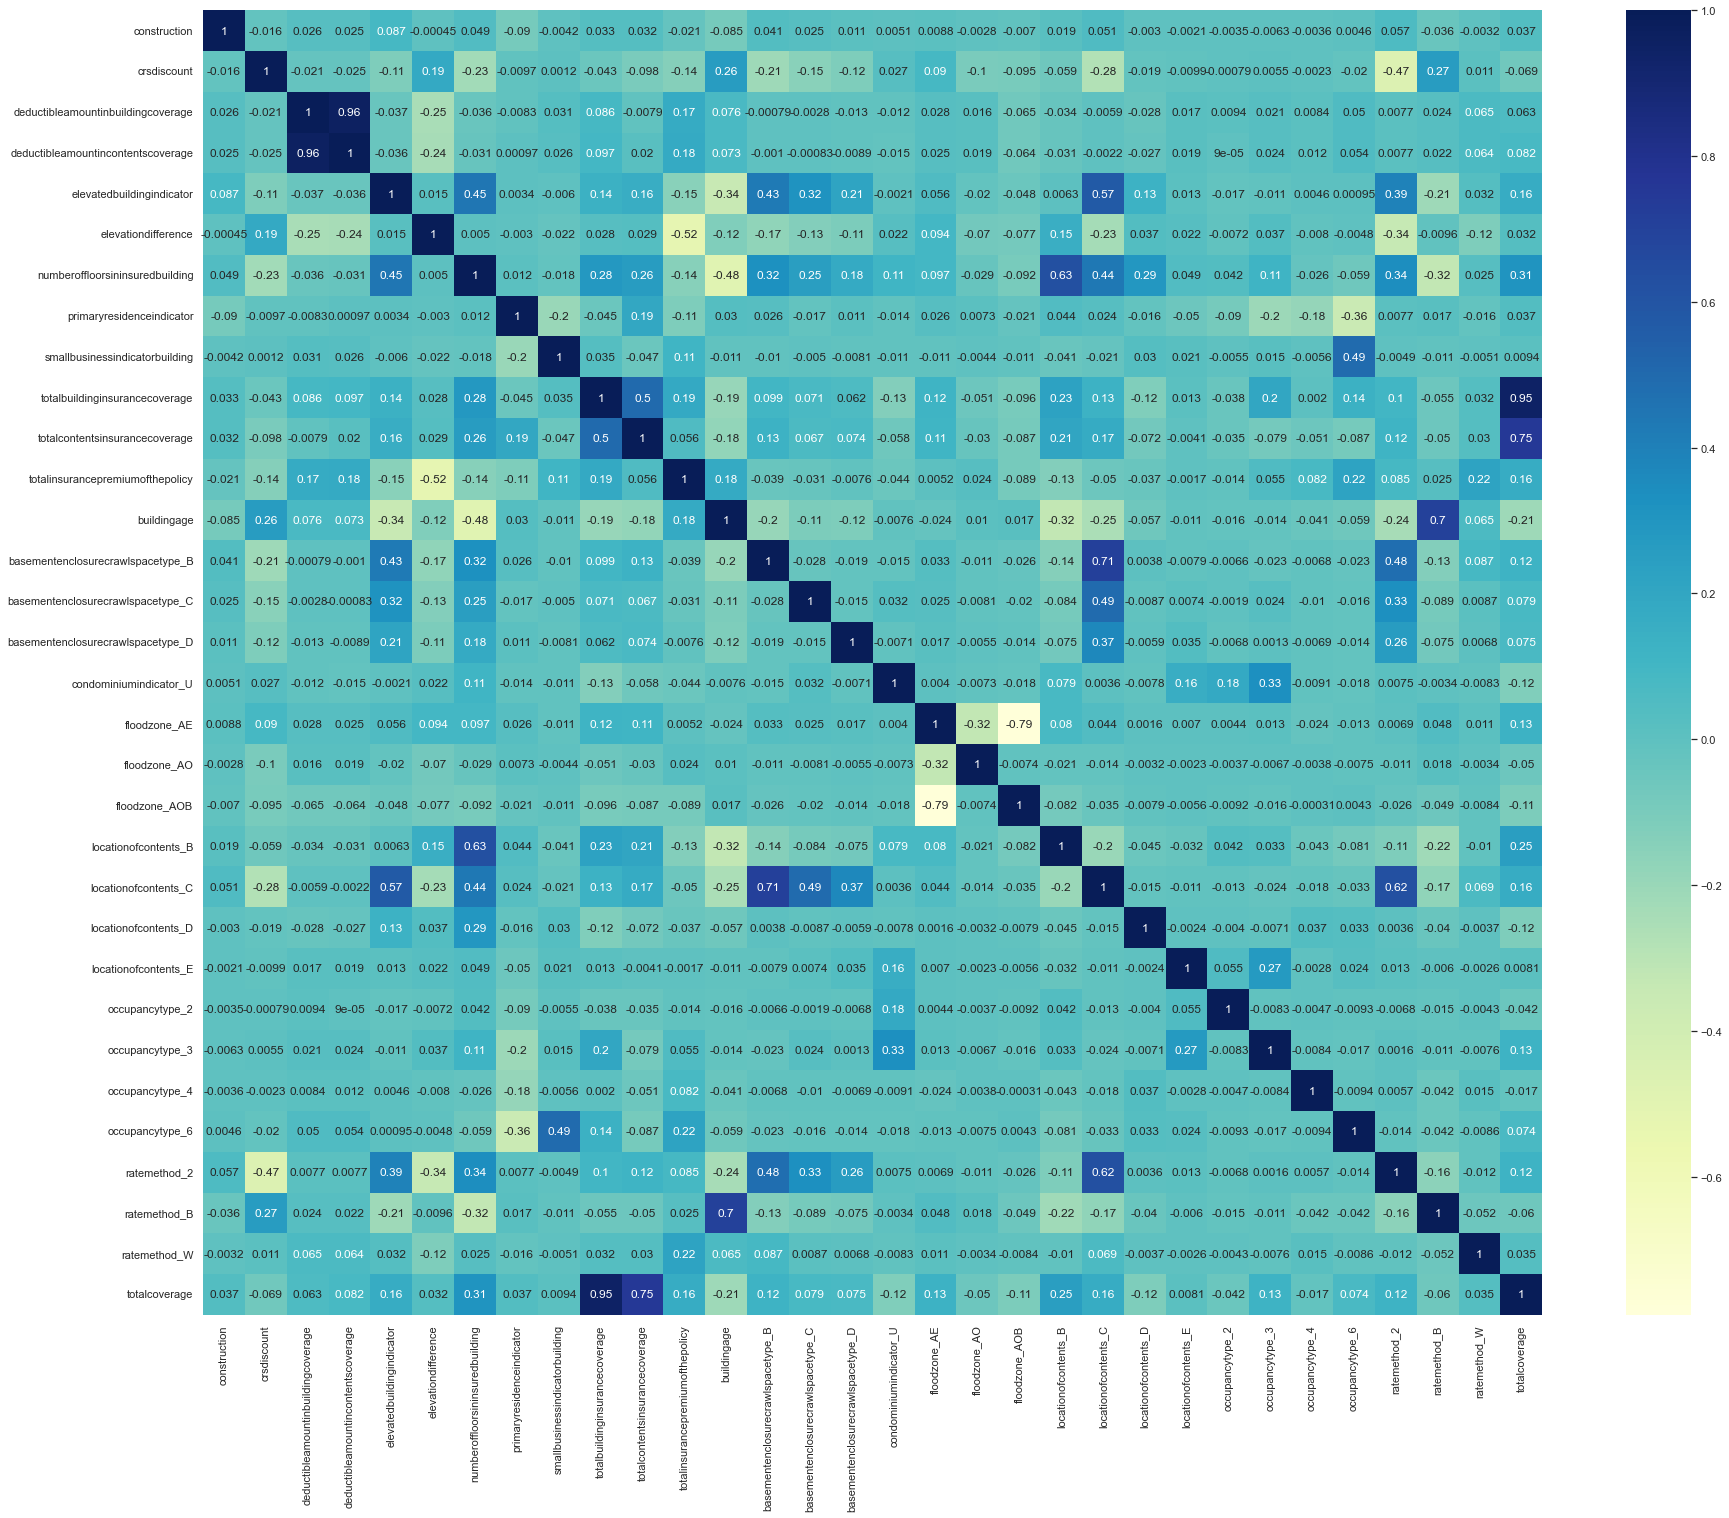

In [72]:
sns.set(rc = {'figure.figsize':(30,24)})
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [73]:
df.corr()

,construction,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationdifference,numberoffloorsininsuredbuilding,primaryresidenceindicator,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,...,locationofcontents_D,locationofcontents_E,occupancytype_2,occupancytype_3,occupancytype_4,occupancytype_6,ratemethod_2,ratemethod_B,ratemethod_W,totalcoverage
construction,1.000000,-0.015832,0.025811,0.025478,0.086977,-0.000451,0.049077,-0.089568,-0.004185,0.032524,...,-0.003028,-0.002139,-0.003529,-0.006321,-0.003560,0.004585,0.057142,-0.036343,-0.003237,0.036596
crsdiscount,-0.015832,1.000000,-0.020726,-0.025176,-0.113139,0.185654,-0.229815,-0.009681,0.001230,-0.042551,...,-0.019300,-0.009923,-0.000787,0.005454,-0.002273,-0.020191,-0.468079,0.265680,0.011442,-0.068514
deductibleamountinbuildingcoverage,0.025811,-0.020726,1.000000,0.964147,-0.037187,-0.245528,-0.036076,-0.008325,0.030609,0.086293,...,-0.028370,0.016966,0.009414,0.021487,0.008371,0.049735,0.007708,0.024480,0.064794,0.062979
deductibleamountincontentscoverage,0.025478,-0.025176,0.964147,1.000000,-0.036067,-0.239619,-0.031039,0.000973,0.025722,0.097316,...,-0.026582,0.019177,0.000090,0.024296,0.011685,0.053841,0.007715,0.022125,0.063922,0.081850
elevatedbuildingindicator,0.086977,-0.113139,-0.037187,-0.036067,1.000000,0.015074,0.445404,0.003413,-0.005951,0.137322,...,0.127827,0.013455,-0.017383,-0.010602,0.004599,0.000949,0.393242,-0.211657,0.031897,0.162986
elevationdifference,-0.000451,0.185654,-0.245528,-0.239619,0.015074,1.000000,0.004971,-0.003041,-0.022020,0.027889,...,0.037185,0.022231,-0.007180,0.037444,-0.007958,-0.004769,-0.341408,-0.009616,-0.115226,0.031939
numberoffloorsininsuredbuilding,0.049077,-0.229815,-0.036076,-0.031039,0.445404,0.004971,1.000000,0.011694,-0.017903,0.281044,...,0.289983,0.049168,0.042036,0.114283,-0.025808,-0.058822,0.339362,-0.324149,0.025142,0.310704
primaryresidenceindicator,-0.089568,-0.009681,-0.008325,0.000973,0.003413,-0.003041,0.011694,1.000000,-0.201539,-0.044901,...,-0.015776,-0.049795,-0.089902,-0.202577,-0.181842,-0.362246,0.007718,0.017278,-0.015745,0.036797
smallbusinessindicatorbuilding,-0.004185,0.001230,0.030609,0.025722,-0.005951,-0.022020,-0.017903,-0.201539,1.000000,0.034954,...,0.029952,0.021161,-0.005506,0.015337,-0.005554,0.492395,-0.004860,-0.011120,-0.005050,0.009367
totalbuildinginsurancecoverage,0.032524,-0.042551,0.086293,0.097316,0.137322,0.027889,0.281044,-0.044901,0.034954,1.000000,...,-0.118935,0.012543,-0.037951,0.201855,0.002005,0.139275,0.100180,-0.054941,0.031635,0.947425


Seems `elevationdifference` has the largest correlation to the target. 

In [74]:
#The target and total_coverage have a wide range so we can use log 10 to scale them
df['premium_scale'] = np.log10(df['totalinsurancepremiumofthepolicy'])
df['coverage_scale'] = np.log10(df['totalcoverage'])

In [75]:
df.head()

,construction,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationdifference,numberoffloorsininsuredbuilding,primaryresidenceindicator,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,...,occupancytype_2,occupancytype_3,occupancytype_4,occupancytype_6,ratemethod_2,ratemethod_B,ratemethod_W,totalcoverage,premium_scale,coverage_scale
5,0,3.0,6.0,4.0,0,1,1.0,1,0,199700,...,0,0,0,0,0,0,0,254800,2.860937,5.406199
27,0,5.0,2.0,2.0,0,7,1.0,1,0,100000,...,0,0,0,0,0,1,0,120000,2.324282,5.079181
29,0,5.0,2.5,2.5,0,0,1.0,0,0,250000,...,0,0,0,0,0,0,0,350000,3.187521,5.544068
53,0,5.0,2.5,2.5,0,3,2.0,1,0,220000,...,1,0,0,0,0,1,0,304000,2.550228,5.482874
68,0,5.0,2.5,2.5,0,3,1.0,1,0,104500,...,0,0,0,0,0,1,0,157000,2.423246,5.195900


Let's check the histogram of the target. 

Text(0, 0.5, 'Number of Houses')

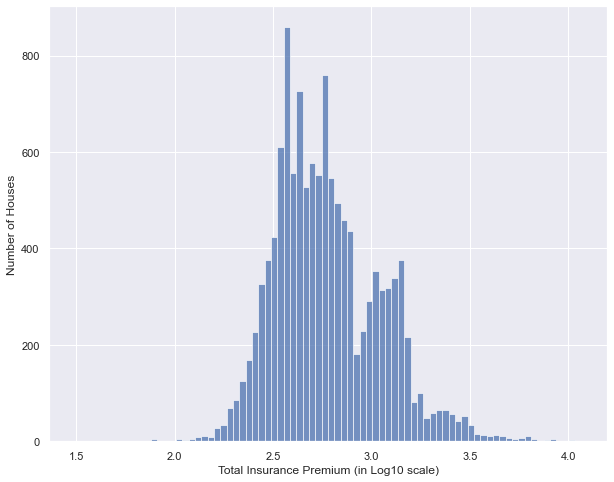

In [76]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.histplot(data=df, x='premium_scale')
plt.xlabel('Total Insurance Premium (in Log10 scale)')
plt.ylabel('Number of Houses')

Let's check the relationship between total coverage and insurance premium.

-0.6700718869199898


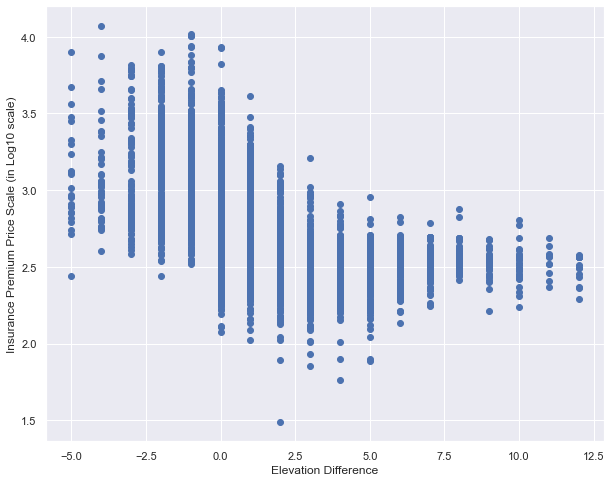

In [77]:
plt.scatter(df['elevationdifference'], df['premium_scale'])
plt.xlabel('Elevation Difference')
plt.ylabel('Insurance Premium Price Scale (in Log10 scale)')
r, p = scipy.stats.pearsonr(x=df['elevationdifference'], y=df['premium_scale'])
print(r)

0.2238187068727136


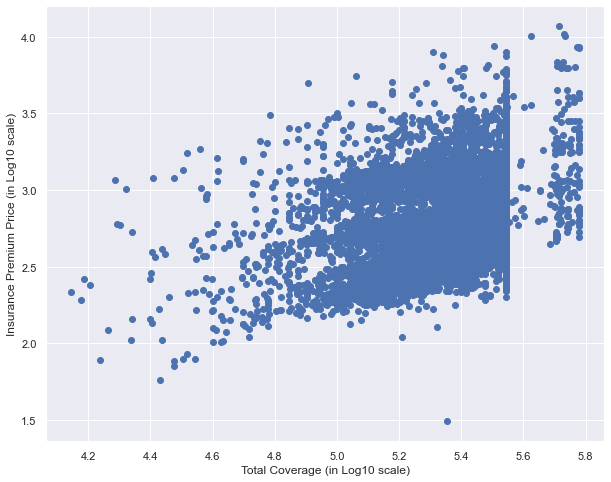

In [78]:
plt.scatter(df['coverage_scale'], df['premium_scale'])
plt.xlabel('Total Coverage (in Log10 scale)')
plt.ylabel('Insurance Premium Price (in Log10 scale)')
r, p = scipy.stats.pearsonr(x=np.log10(df['totalcoverage']), y=np.log10(df['totalinsurancepremiumofthepolicy']))
print(r)

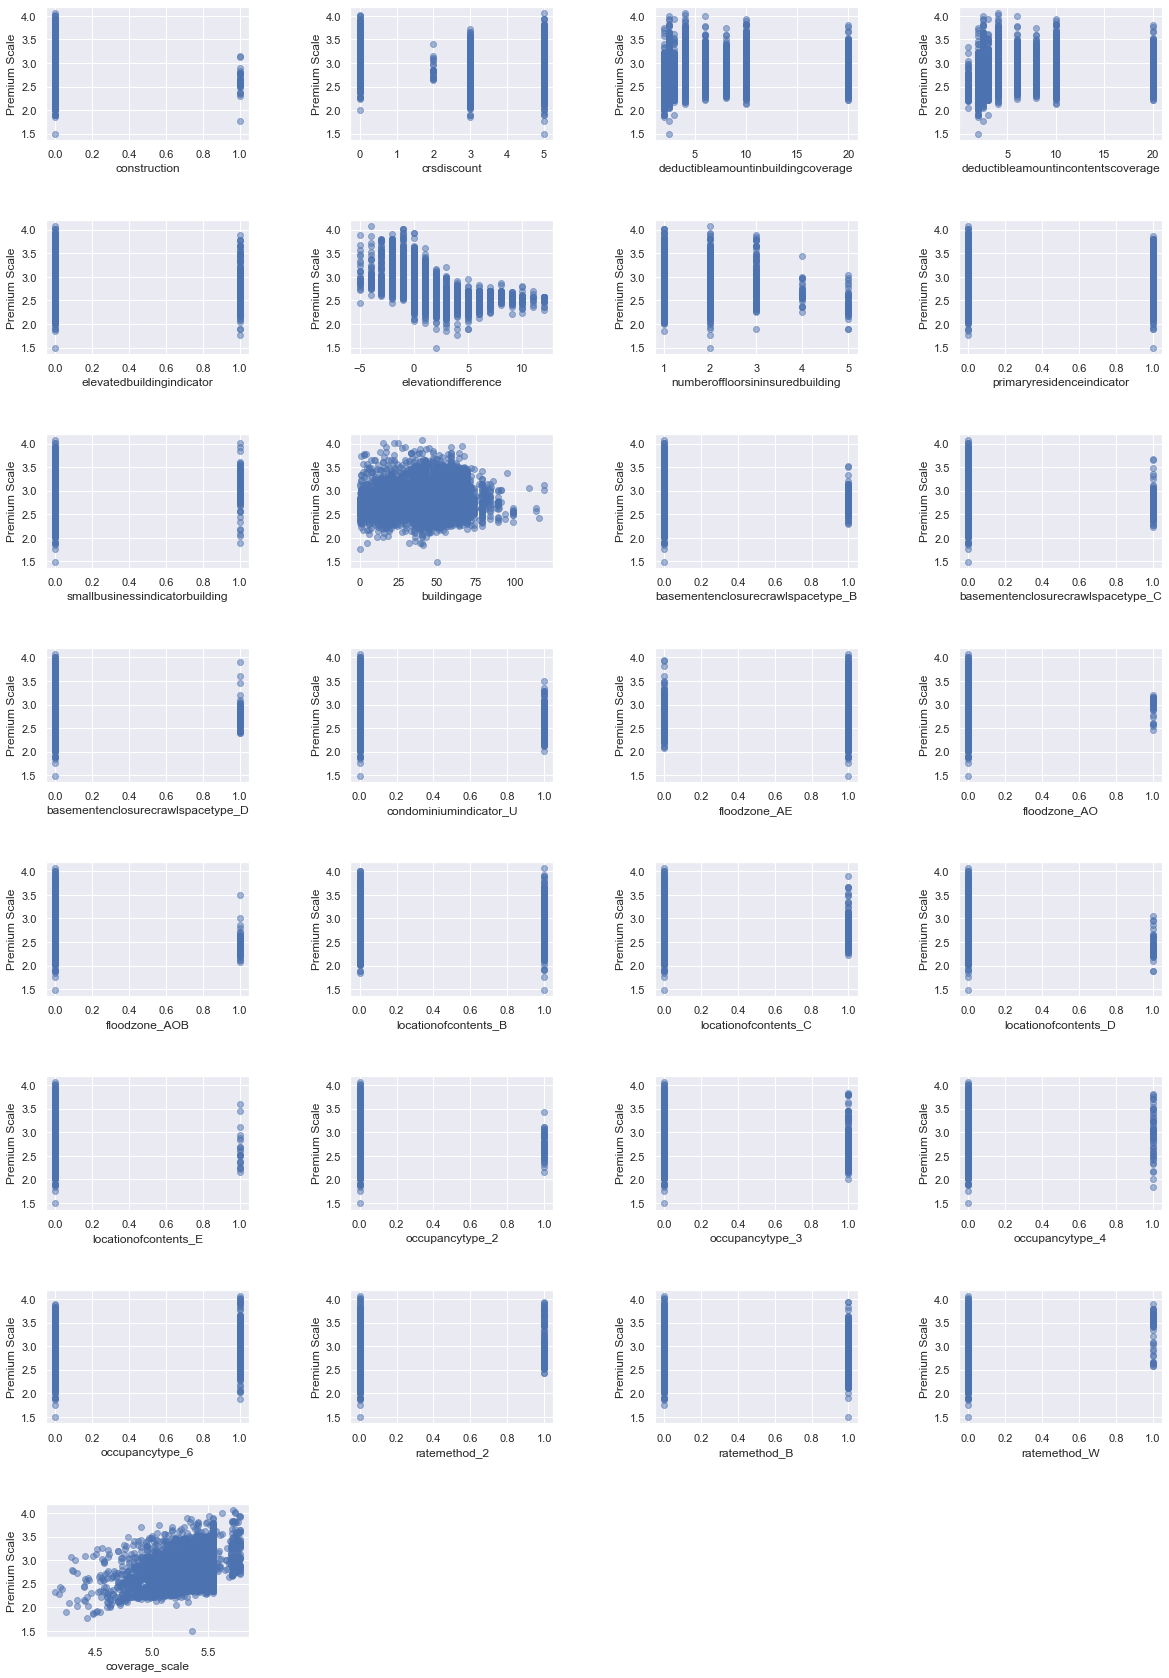

In [79]:
# Let's create the scatterplot between the target and all numerical features
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'premium_scale', data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel='Premium Scale')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
        
features = [column for column in df.columns if column not in ['totalbuildinginsurancecoverage', 
                'totalcontentsinsurancecoverage', 'totalinsurancepremiumofthepolicy', 'totalcoverage', 'premium_scale']]
scatterplots(features, ncol=4, figsize=(20,30))

As we can see, premium has high correlation with elevationdifference and coverage_scale. For categorical features, the realtionship is hard to tell.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12334 entries, 5 to 32361
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   construction                        12334 non-null  int32  
 1   crsdiscount                         12334 non-null  float64
 2   deductibleamountinbuildingcoverage  12334 non-null  float64
 3   deductibleamountincontentscoverage  12334 non-null  float64
 4   elevatedbuildingindicator           12334 non-null  int32  
 5   elevationdifference                 12334 non-null  int64  
 6   numberoffloorsininsuredbuilding     12334 non-null  float64
 7   primaryresidenceindicator           12334 non-null  int32  
 8   smallbusinessindicatorbuilding      12334 non-null  int32  
 9   totalbuildinginsurancecoverage      12334 non-null  int64  
 10  totalcontentsinsurancecoverage      12334 non-null  int64  
 11  totalinsurancepremiumofthepolicy    12334

In [81]:
df.drop_duplicates(keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12334 entries, 5 to 32361
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   construction                        12334 non-null  int32  
 1   crsdiscount                         12334 non-null  float64
 2   deductibleamountinbuildingcoverage  12334 non-null  float64
 3   deductibleamountincontentscoverage  12334 non-null  float64
 4   elevatedbuildingindicator           12334 non-null  int32  
 5   elevationdifference                 12334 non-null  int64  
 6   numberoffloorsininsuredbuilding     12334 non-null  float64
 7   primaryresidenceindicator           12334 non-null  int32  
 8   smallbusinessindicatorbuilding      12334 non-null  int32  
 9   totalbuildinginsurancecoverage      12334 non-null  int64  
 10  totalcontentsinsurancecoverage      12334 non-null  int64  
 11  totalinsurancepremiumofthepolicy    12334

Save the final DataFrame to a new csv file which will be used in the modeling. 

In [82]:
dff = df.drop(columns=['totalbuildinginsurancecoverage', 'totalcontentsinsurancecoverage', 'totalinsurancepremiumofthepolicy', 
                      'totalcoverage'])

In [83]:
dff.drop_duplicates(keep='first', inplace=True)
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12332 entries, 5 to 32361
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   construction                        12332 non-null  int32  
 1   crsdiscount                         12332 non-null  float64
 2   deductibleamountinbuildingcoverage  12332 non-null  float64
 3   deductibleamountincontentscoverage  12332 non-null  float64
 4   elevatedbuildingindicator           12332 non-null  int32  
 5   elevationdifference                 12332 non-null  int64  
 6   numberoffloorsininsuredbuilding     12332 non-null  float64
 7   primaryresidenceindicator           12332 non-null  int32  
 8   smallbusinessindicatorbuilding      12332 non-null  int32  
 9   buildingage                         12332 non-null  float64
 10  basementenclosurecrawlspacetype_B   12332 non-null  uint8  
 11  basementenclosurecrawlspacetype_C   12332

In [84]:
dff.to_csv('../data/data_for_model.csv', index=False)

## 2.6 Summary<a id='2.6_Summary'></a>

The exploratory data analysis (EDA) is conducted, which further checks the categorical features, missing values, and relationships between the target and features. A new DataFrame is created, which has more than 12,000 records and will be used in the subsequent modeling. 